Accuracy: 0.4500
Precision: 0.4444
Recall: 0.4000
F1-Score: 0.4211


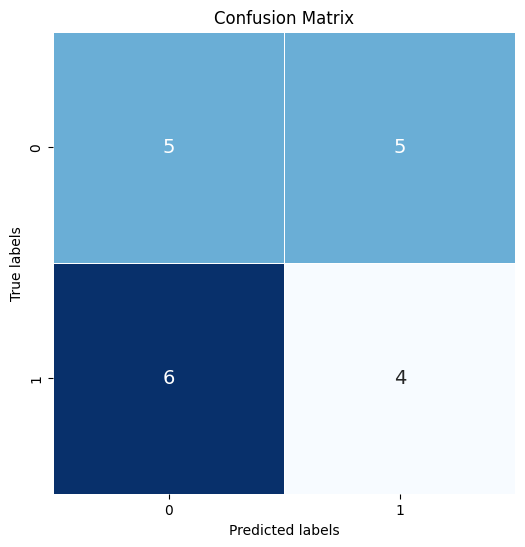

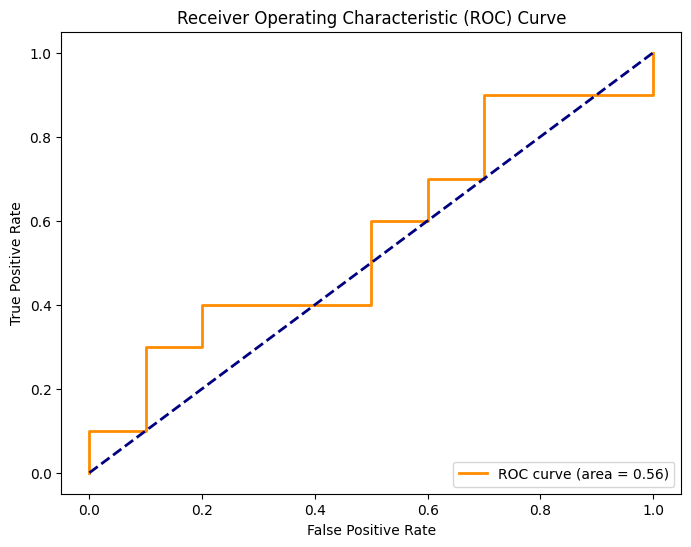

AUC: 0.5600
Cross-Validation Accuracy: 0.4000 (std: 0.0894)


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a sample dataset (replace with your actual data loading code)
# Generate a sample dataset
np.random.seed(42)
X = np.random.randn(100, 10)  # Example features
y = np.random.randint(0, 2, 100)  # Example binary labels

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a classifier (Logistic Regression in this example)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class

# Calculate accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.4f}')

# Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

print(f'Cross-Validation Accuracy: {cv_results.mean():.4f} (std: {cv_results.std():.4f})')
